In [1]:
import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt

import ssl, json, calendar

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
y = '2018'

url = 'https://github.com/users/chAwater/contributions?from=' + y + '-12-01&to=' + y + '-12-31'
html  = urlopen(url)
bsObj = BeautifulSoup(html,'lxml')
table = bsObj.findAll('rect', {'class':'day'})

In [4]:
df = pd.DataFrame(
    [ rect.attrs for rect in table ]
).drop( ['class','height','width'], axis=1 ).astype(
    {
        'x':int, 'y':int,
        'data-count':int
    }
)

df['x'] += -1*df.min()['x']

df['date'] = pd.to_datetime(df['data-date'])

df['month']   = df['date'].apply(lambda row: calendar.month_abbr[row.month])
df['year']    = df['date'].apply(lambda row: row.year)
df['weekday'] = df['date'].apply(lambda row: row.day_name()[:3])

df = df.query('year==2018')

x_labels = df.loc[ df['month'].drop_duplicates().index , ['x','month']]
y_labels = df[['y','weekday']].drop_duplicates().sort_values('y')[1::2]

In [5]:
# c_lables = df.groupby('fill')['data-count'].max().sort_values().apply( lambda row: np.ceil(row/5).astype(int)*5 ).reset_index()
c_lables = df.groupby('fill')['data-count'].max().sort_values().reset_index()
c_lables['idx'] = c_lables.index.to_numpy()*5

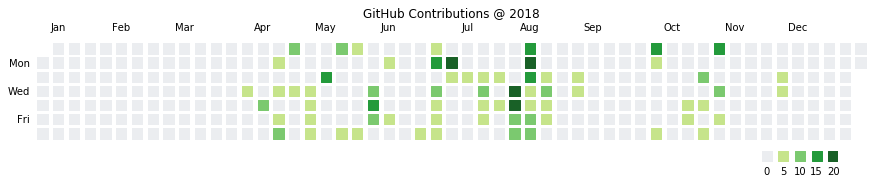

In [6]:
fig, ax = plt.subplots(figsize=(15,2))
cbar_ax = fig.add_axes([0.80, 0.0, 0.07, 0.1]) # [left, bottom, width, height]

ax.scatter( x=df['x'], y=df['y'], color=df['fill'], s=105, marker='s')

ax.set_xlim( ax.get_xlim()[1]-2, ax.get_xlim()[0]+2 )
ax.set_ylim( ax.get_ylim()[1]+8, ax.get_ylim()[0]-8 )
    
ax.set_xticks(x_labels['x']-1)
ax.set_xticklabels(x_labels['month'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.set_yticks(y_labels['y'])
ax.set_yticklabels(y_labels['weekday'])

ax.tick_params(length=0)

cbar_ax.scatter( x=c_lables.index.tolist(), y=[0]*c_lables.shape[0], color=c_lables['fill'], s=100, marker='s')
cbar_ax.set_yticks([])
cbar_ax.set_xticks(c_lables.index.tolist())
cbar_ax.set_xticklabels(c_lables['idx'])
cbar_ax.tick_params(length=0)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_visible(False)
    cbar_ax.spines[axis].set_visible(False)
    
ax.set_title('GitHub Contributions @ '+y)

plt.show()